In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Implementing a perceptron learning algorithm in Python

In [2]:
import numpy as np


class Perceptron():
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1): 
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """ 
        #
        rgen = np.random.RandomState(self.random_state) #generate random vectors
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #loc=mean, scale=std  np([w0, w1, w2, w3, w4]) , size=5
        self.errors_ = []

        for _ in range(self.n_iter): 
            errors = 0
            for xi, target in zip(X, y): #[(x^1, y^1), (x^2, y^2), (), ..., ()]
                prediction = self.predict(xi) # y_hat >> Phi(transpose of (W)*x)
                update = self.eta * (target - prediction) ## update occaur when error accuar

                xi = np.insert(xi, 0, 1, axis=0) #insert x0 = 1

                dw_ = update * xi
                self.w_ = self.w_ + dw_

                errors += int(update != 0.0)
                
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] * 1

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Reading-in the BankNote data

### list of the five variables in the dataset.
* variance of Wavelet Transformed image (continuous).
* skewness of Wavelet Transformed image (continuous).
* kurtosis of Wavelet Transformed image (continuous).
* entropy of image (continuous).
* class (integer).

In [3]:
df = pd.read_csv('banknote.txt', header=None, encoding='utf-8')
df.columns=['variance of Wavelet Transformed image'
            ,'skewness of Wavelet Transformed image'
            ,'kurtosis of Wavelet Transformed image'
            ,'entropy of image'
            ,'class']
df.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,kurtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Select Just Two Features of bankNote Data

In [4]:
# df.shape[1]-1 >> To Get Just last column
y = df.iloc[:, df.shape[1]-1].values # From index 0 to end of dataset
# make value 1 for authentic and -1 for inauthentic
y = np.where(y == 0, -1, 1)

In [5]:
y.shape

(1372,)

In [6]:
# :df.shape[1]-1 >> To Get All columns except labels column
X = df.iloc[:,[0,2]].values

In [7]:
X.shape

(1372, 2)

In [8]:
X

array([[ 3.6216, -2.8073],
       [ 4.5459, -2.4586],
       [ 3.866 ,  1.9242],
       ...,
       [-3.7503, 17.5932],
       [-3.5637, 12.393 ],
       [-2.5419,  2.6842]])

In [9]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Get Features in column 0 with lebal 0


In [10]:
x_feature0_auth=df.loc[df['class']==0,'variance of Wavelet Transformed image'].values
x_feature0_auth.shape

(762,)

Get Features in column 2 with lebal 0

In [11]:
x_feature2_auth=df.loc[df['class']==0,'kurtosis of Wavelet Transformed image'].values
x_feature2_auth.shape

(762,)

Get Features in column 0 with lebal 1

In [12]:
x_feature0_NOTauth=df.loc[df['class']==1,'variance of Wavelet Transformed image'].values
x_feature0_NOTauth.shape

(610,)

Get Features in column 2 with lebal 0

In [13]:
x_feature2_NOTauth=df.loc[df['class']==1,'kurtosis of Wavelet Transformed image'].values
x_feature2_NOTauth.shape

(610,)

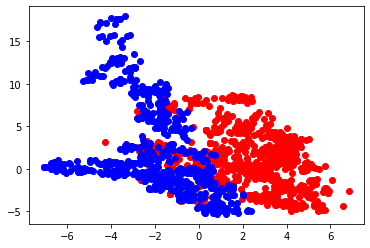

In [14]:
plt.scatter(x_feature0_auth, x_feature2_auth,color='red', marker='o', label='Feature 0')
plt.scatter(x_feature0_NOTauth, x_feature2_NOTauth,color='blue', marker='o', label='Feature 0')

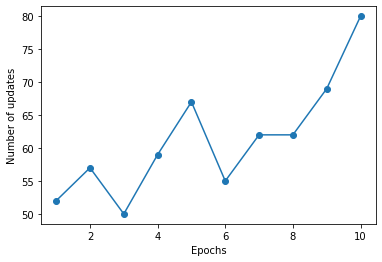

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [16]:
# To get last Number of error point
print(ppn.errors_[-1])

80


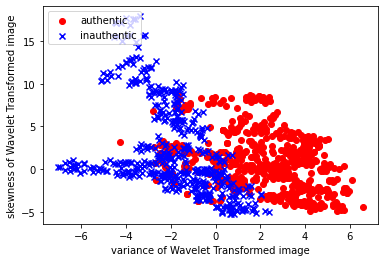

In [17]:
# plot data
plt.scatter(X[0:610, 0], X[0:610, 1],
            color='red', marker='o', label='authentic')

plt.scatter(X[762:1262, 0], X[762:1262, 1],
            color='blue', marker='x', label='inauthentic')

plt.xlabel('variance of Wavelet Transformed image')
plt.ylabel('skewness of Wavelet Transformed image')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [18]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\YoUsef\AppData\Local\Temp\ipykernel_17712\1032177424.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


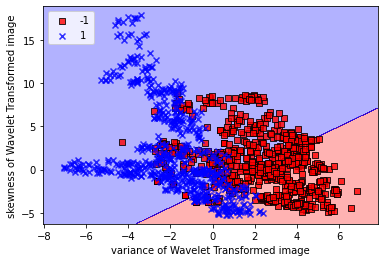

In [19]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('variance of Wavelet Transformed image')
plt.ylabel('skewness of Wavelet Transformed image')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

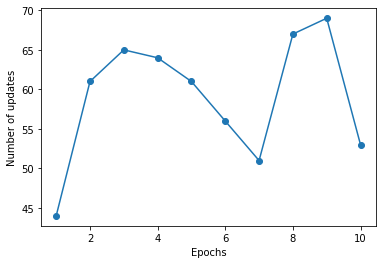

In [20]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [21]:
# To get last Number of error point
print(ppn.errors_[-1])

53


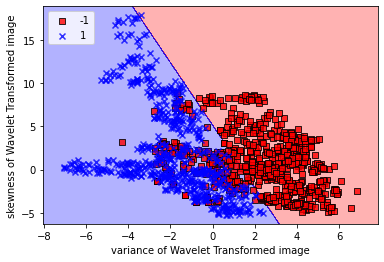

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('variance of Wavelet Transformed image')
plt.ylabel('skewness of Wavelet Transformed image')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
# Get Accuracy
1-ppn.errors_[-1]/y.shape[0]

0.9416909620991254

# Select All Features of bankNote Data

In [ ]:
X=df.iloc[:,[0,1,2,3]].values
X.shape

(1372, 4)

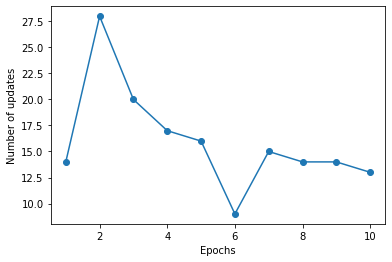

In [ ]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [ ]:
# To get last Number of error point
print(ppn.errors_[-1])

13


In [ ]:
# Get Accuracy
1-ppn.errors_[-1]/y.shape[0]

0.9905247813411079